# Customer Churn Prediction Model

Devan K S

Entri Elevate

### Problem Statement

Customer churn is a significant challenge for businesses, leading to loss of revenue and increased customer acquisition costs. Accurately predicting churn enables companies to retain valuable customers through targeted interventions and personalized offers. This project aims to develop a churn prediction model to identify customers likely to leave the bank.

### Object

To develop a robust churn prediction model using machine learning techniques to predict whether a customer will leave or not.

### Data Description

* <b> Source: [Dataset]("https://data.world/sonalnew/credit-card-customers/workspace/file?filename=BankChurners.csv")
* __Feature:__ Customer attributes such as age, gender, credit limit, transaction counts, and more
* __Target variable:__ Attrition_flag

### Data Collection

In [1]:
#ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#importing libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df = pd.read_csv("Bank_data.csv")
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


### Exploratory Data Analysis

In [4]:
#checking shape
df.shape

(10127, 23)

Data set contains 10127 rows and 23 columns

In [5]:
#checking dataset informations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

Data set mainly have int,float and object as datatypes

In [6]:
#displaying columns
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [7]:
#identifying categorical and numericalcolumns
cat_cols = df.select_dtypes(["object"]).columns
num_cols = df.select_dtypes(["int64" , "float64"]).columns
print("Categorical columns", "\n" , cat_cols,"\n" '******')
print("Numerical columns" ,"\n", num_cols)

Categorical columns 
 Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object') 
******
Numerical columns 
 Index(['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')


Data set consist of 17 numerical columns and 6 categorical columns

In [8]:
#checking unique values
df.nunique

<bound method DataFrame.nunique of        CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Existing Customer            45      M                3   
1      818770008  Existing Customer            49      F                5   
2      713982108  Existing Customer            51      M                3   
3      769911858  Existing Customer            40      F                4   
4      709106358  Existing Customer            40      M                3   
...          ...                ...           ...    ...              ...   
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Inc

In [9]:
#checking duplicates
df.duplicated().sum()

0

No duplicates found

In [10]:
#checking null values
df.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

We can observe that data set have zero null values

In [11]:
#Droping columns which doesn't provide any analytical insights
columns_to_drop = ['CLIENTNUM',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']
df = df.drop(columns=columns_to_drop)

Droped some columns which will not give any insights.Less important columns 

In [12]:
df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [13]:
df.shape

(10127, 20)

In [14]:
cat_cols = df.select_dtypes(["object"]).columns
num_cols = df.select_dtypes(["int64" , "float64"]).columns
print("Categorical columns", "\n" , cat_cols,"\n" '******')
print("Numerical columns" ,"\n", num_cols)

Categorical columns 
 Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object') 
******
Numerical columns 
 Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')


Observed that after droping columns shape of data set  changes.Now data set consist of 10127 rows and 20 columns.Data set contains 14 numerical columns and 6 categorical columns

### Data Preprocessing

In [15]:
df.describe(include="all")

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127,10127.000000,10127,10127.000000,10127,10127,10127,10127,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
unique,2,NaN,2,NaN,7,4,6,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Existing Customer,NaN,F,NaN,Graduate,Married,Less than $40K,Blue,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,8500,NaN,5358,NaN,3128,4687,3561,9436,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,46.325960,NaN,2.346203,NaN,NaN,NaN,NaN,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,NaN,8.016814,NaN,1.298908,NaN,NaN,NaN,NaN,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,NaN,26.000000,NaN,0.000000,NaN,NaN,NaN,NaN,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,NaN,41.000000,NaN,1.000000,NaN,NaN,NaN,NaN,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,NaN,46.000000,NaN,2.000000,NaN,NaN,NaN,NaN,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,NaN,52.000000,NaN,3.000000,NaN,NaN,NaN,NaN,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000


This shows the statistical summary of data

#### Outlires Detection And Handling

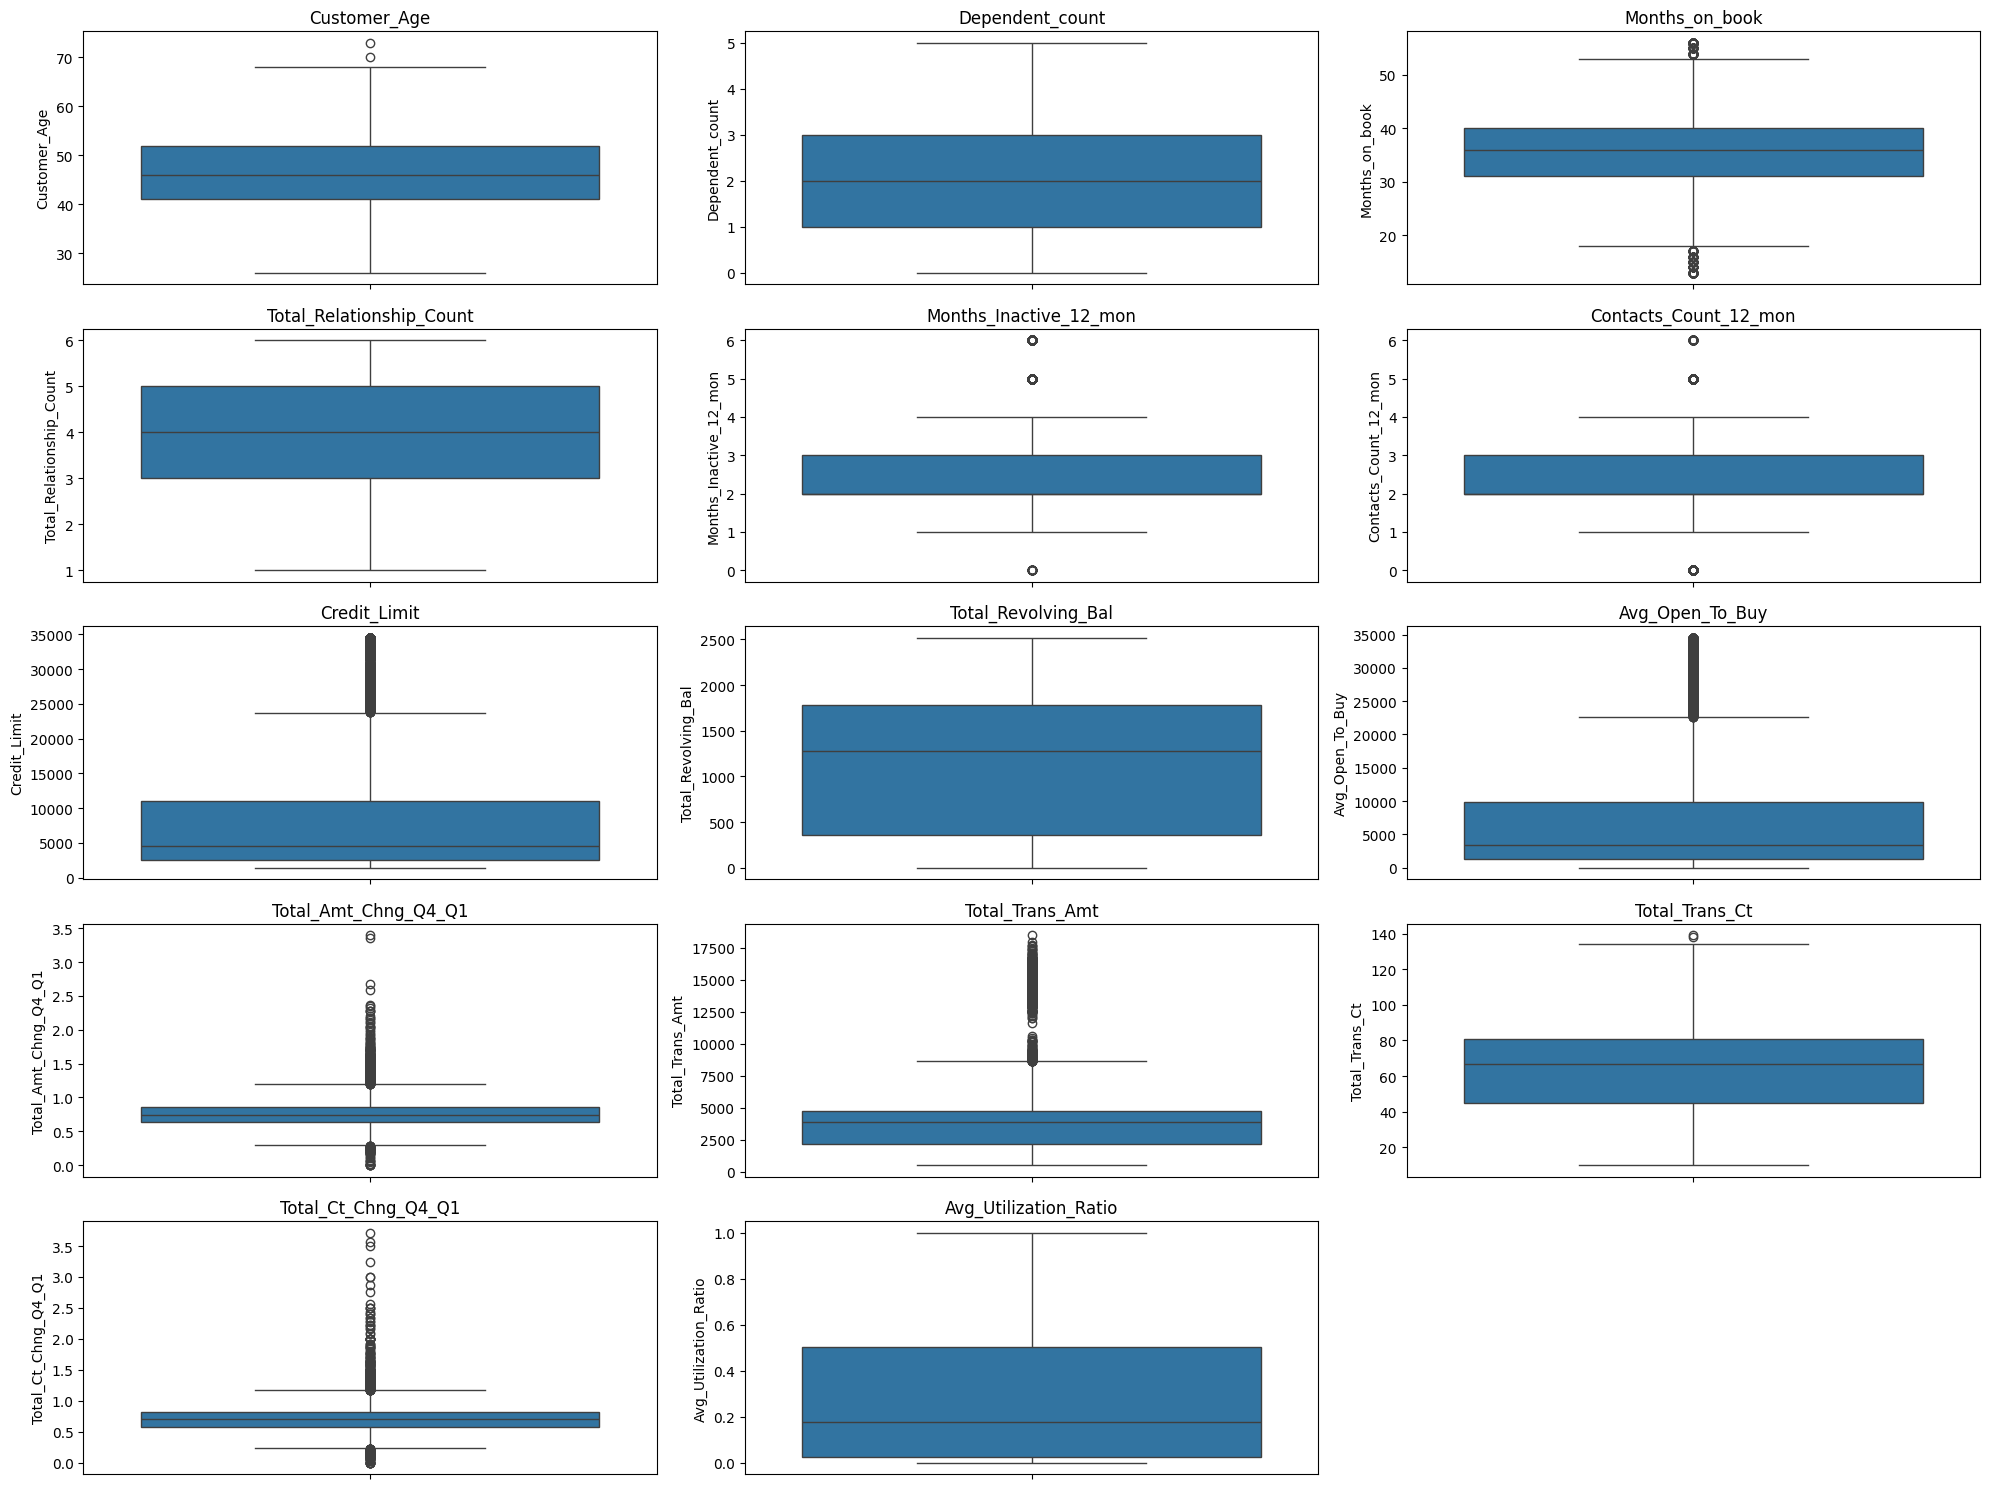

In [16]:
plt.figure(figsize=(20,15))
num_col=df.select_dtypes(include=["int64" , "float64"])

for i,col in enumerate(num_col,1):
    plt.subplot(5,3,i)
    sns.boxplot(df[col])
    plt.title(col)
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

We can observe that severel columns having outlies.These are important columns so that we can only reduce the outliers because fully removing outliers may cause to loss in data and eventualy effect model performance.

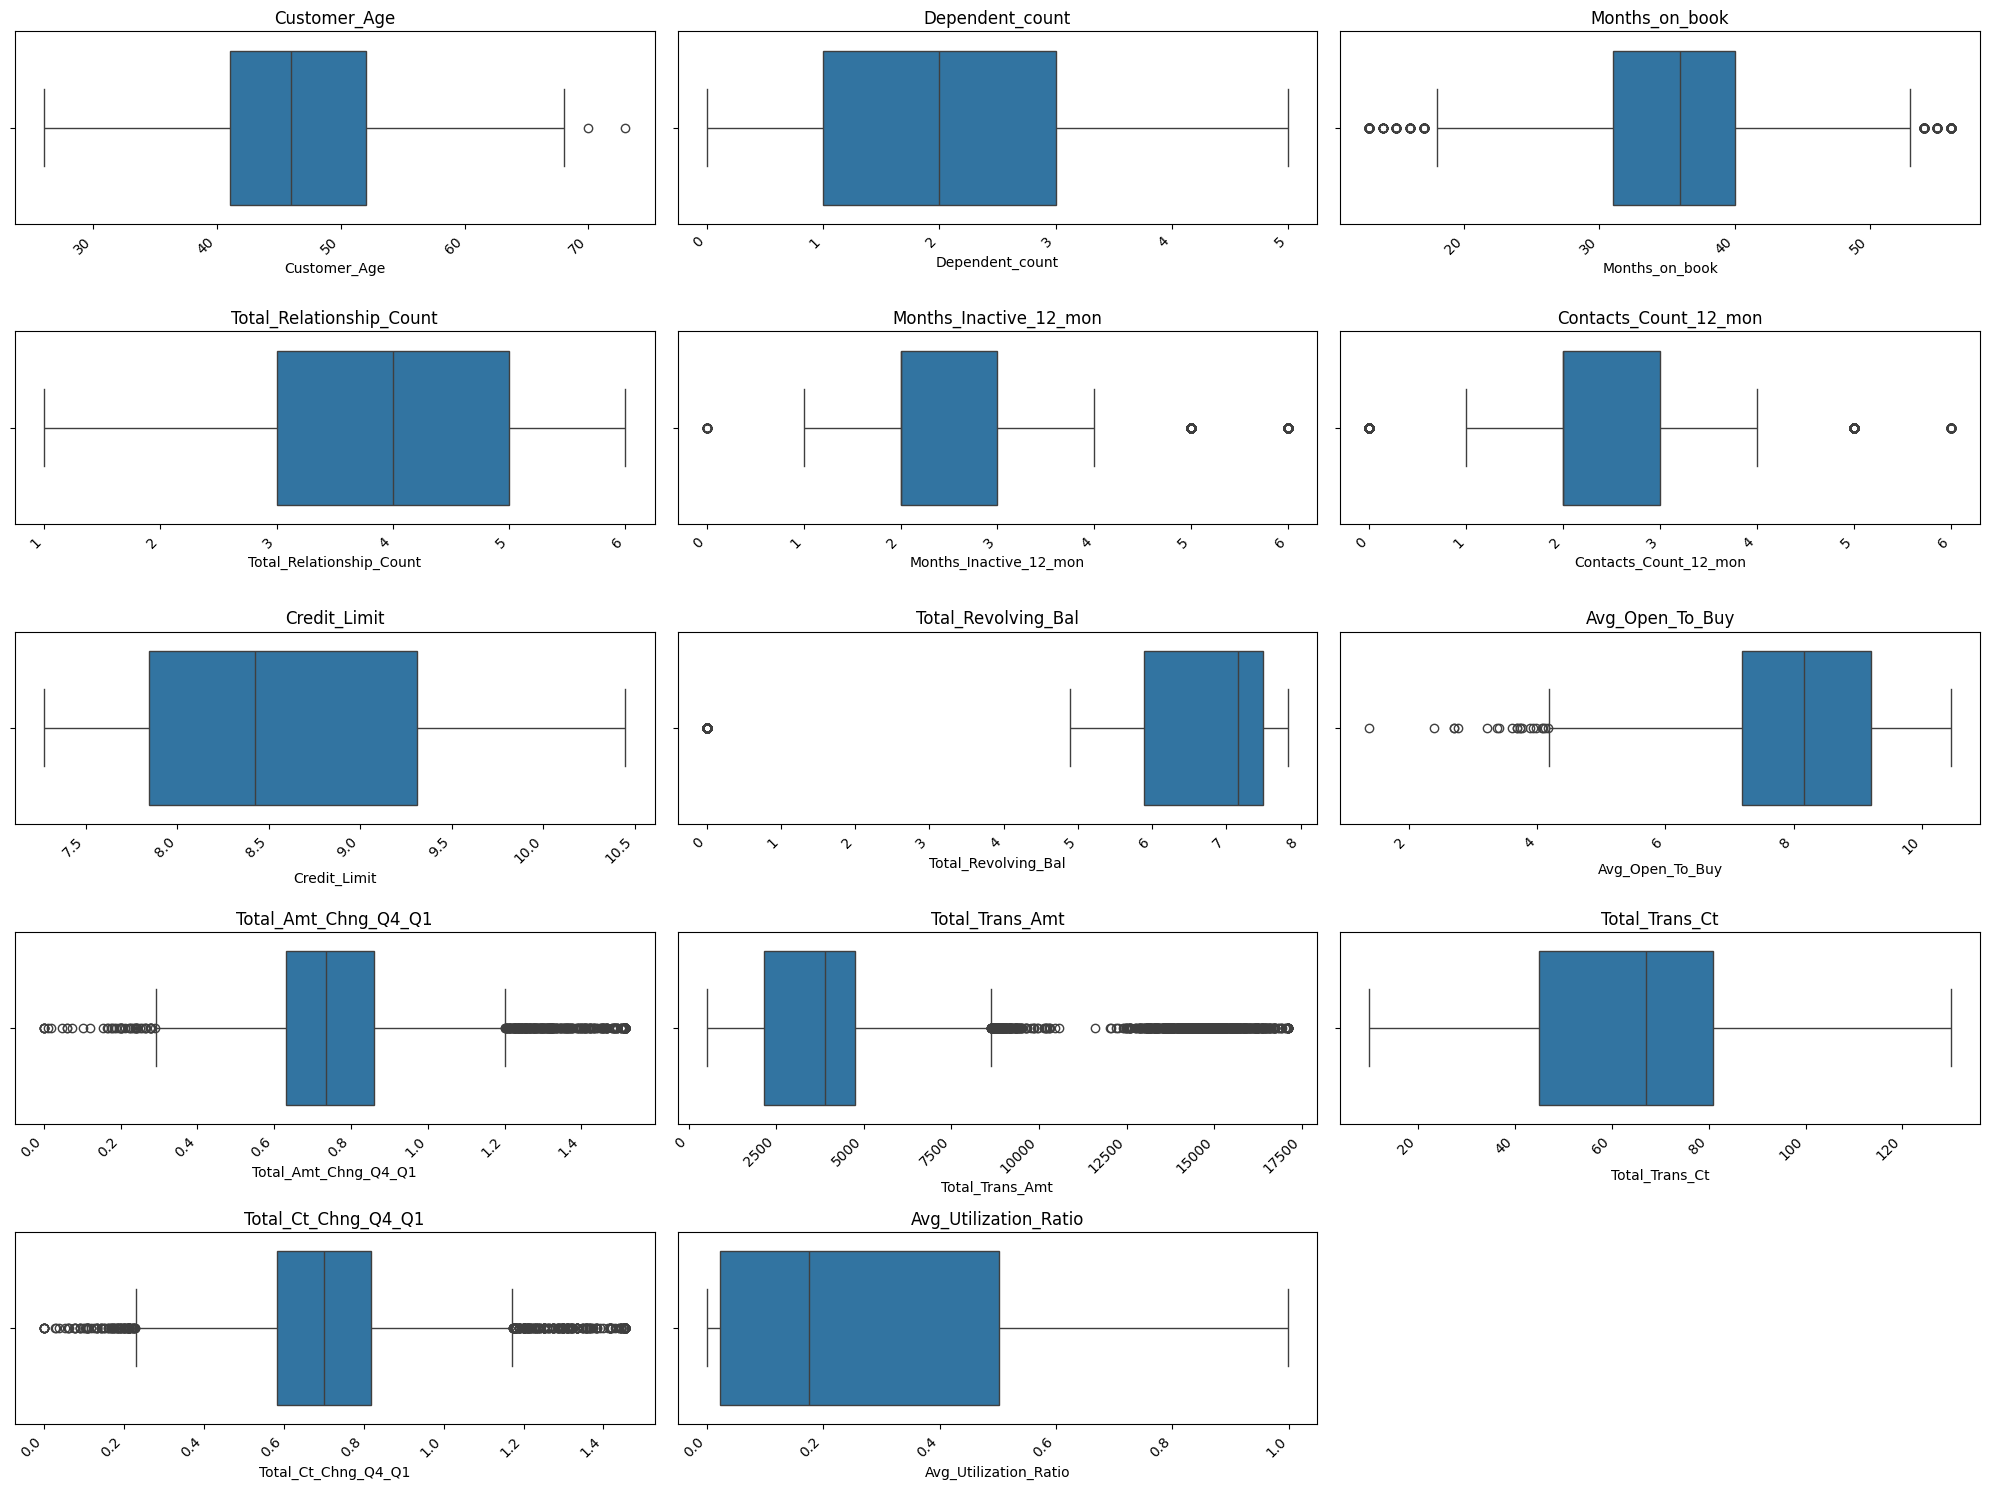

In [17]:
# Cliping age maximum 100 years
df['Customer_Age'] = df['Customer_Age'].clip(upper=100)

# Log transformation
for column in ['Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy']:
    df[column] = np.log1p(df[column])

# Cliping at 99th percentile
for column in ['Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1']:
    df[column] = df[column].clip(upper=df[column].quantile(0.99))

#  Cliping at 99.9th percentile
for column in ['Total_Trans_Amt', 'Total_Trans_Ct']:
    df[column] = df[column].clip(upper=df[column].quantile(0.999))

#  Cliping between 0 and 1
df['Avg_Utilization_Ratio'] = df['Avg_Utilization_Ratio'].clip(0, 1)
                                                               
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
plt.figure(figsize=(20, 15))  # Fixed figure size
for i, col in enumerate(num_cols, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.xticks(rotation=45, ha='right')  #

plt.tight_layout()
plt.show()

Here we handle almost outliers by applying log transformation and percentile methods.we can still see little bit of outliers but removing them may effect in our data

### Visualisation

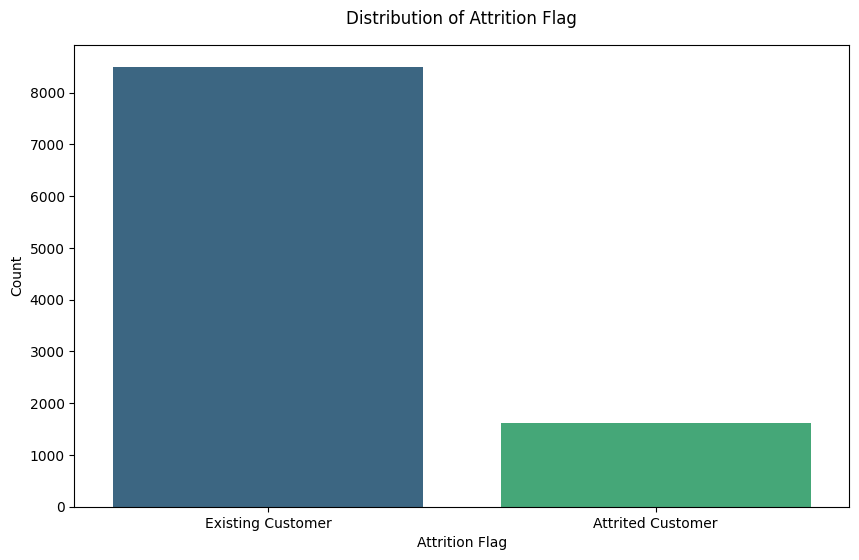

In [18]:
#Bar plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Attrition_Flag', palette='viridis')
plt.title('Distribution of Attrition Flag', fontsize=12, pad=15)
plt.xlabel('Attrition Flag', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.xticks(rotation=0)
plt.show()

This  bar plot shows the distribution between existing customers and attrited(leave) customers.
Here we can see an  imbalance .This may lead to biased prediction.We have to manage this later 

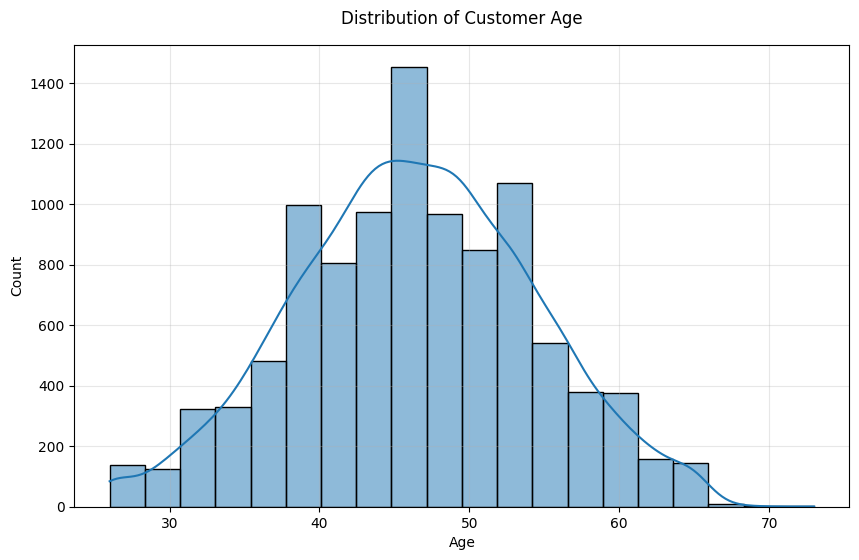

In [19]:
#histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Customer_Age', bins=20, kde=True)
plt.title('Distribution of Customer Age', fontsize=12, pad=15)
plt.xlabel('Age', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.grid(True, alpha=0.3)
plt.show()

From this we can gain the information of bank customers age.we can analyse that between 40 and 50 are the most common bank customers

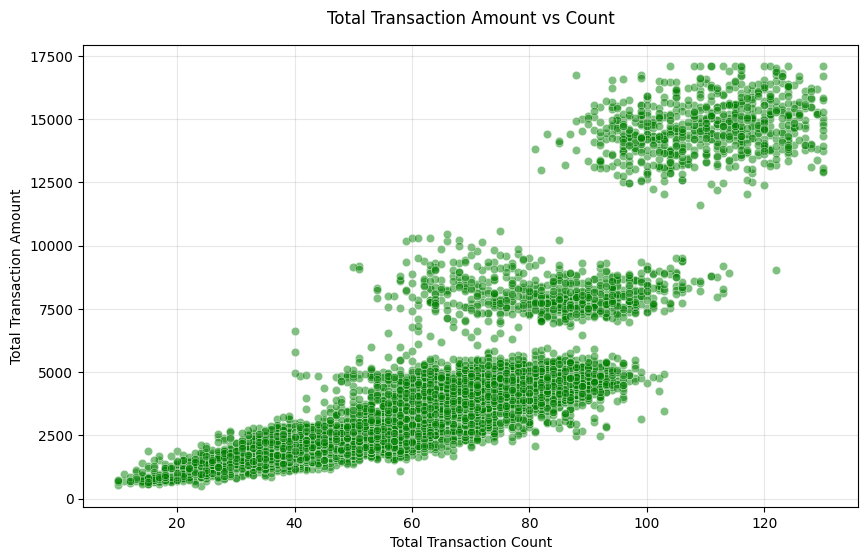

In [20]:
#scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, 
                x='Total_Trans_Ct', 
                y='Total_Trans_Amt',
                color='green',
                alpha=0.5)
plt.title('Total Transaction Amount vs Count', fontsize=12, pad=15)
plt.xlabel('Total Transaction Count', fontsize=10)
plt.ylabel('Total Transaction Amount', fontsize=10)
plt.grid(True, alpha=0.3)
plt.show()

This scatter plot showing total transaction amount versus total transaction count.From this we can get that customers who make more transactions also tend to spend more money overall

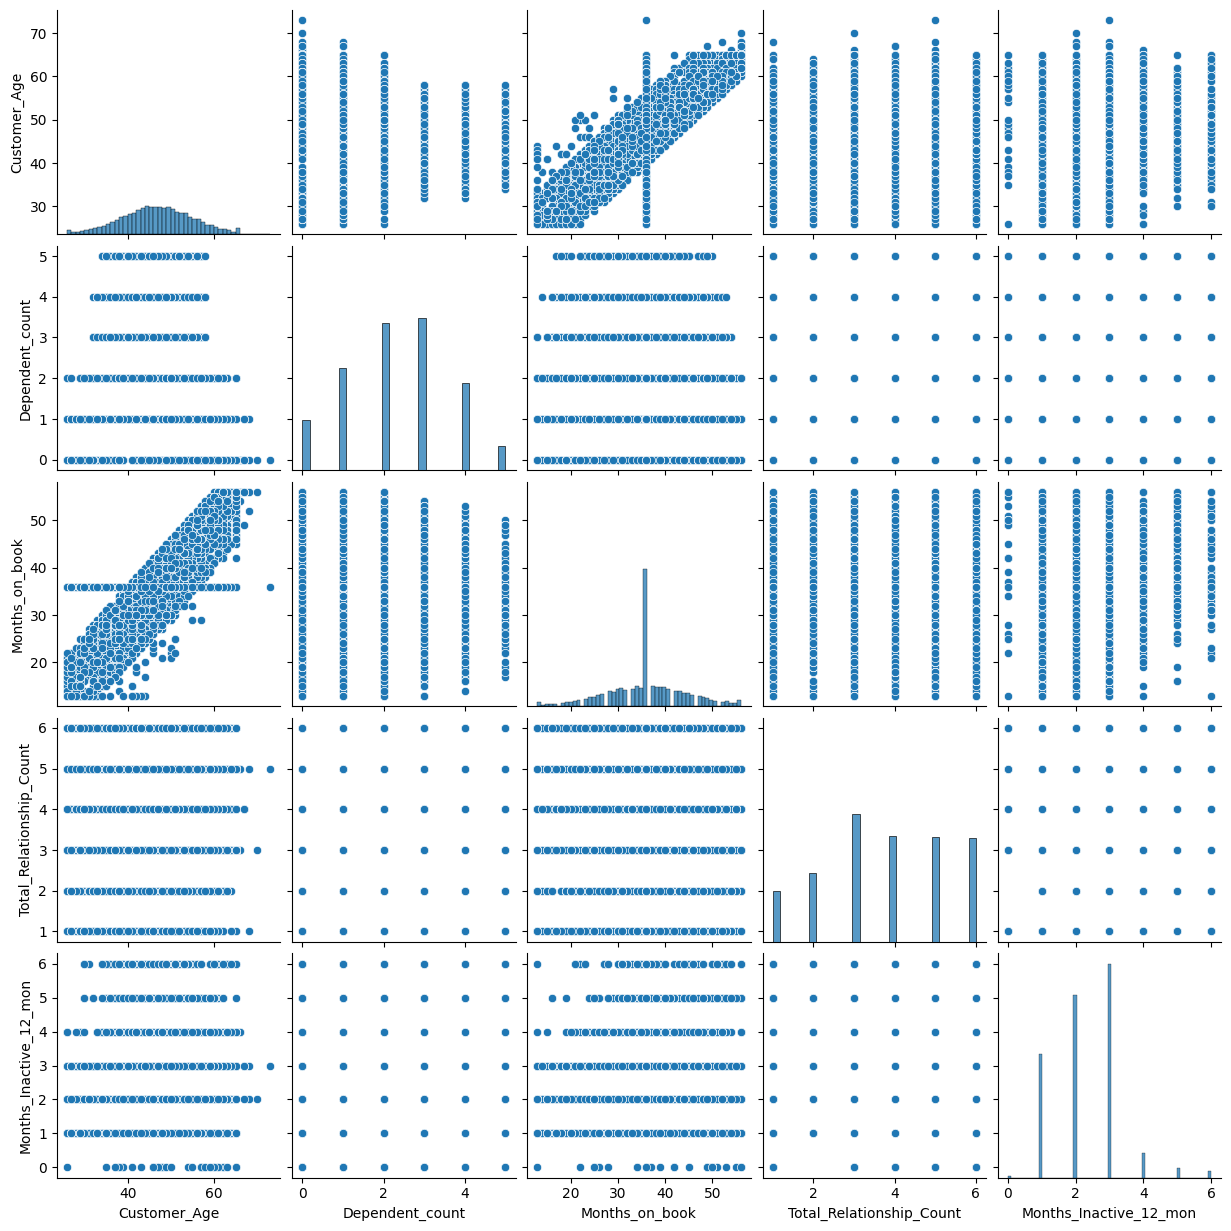

In [21]:
#pair plot
sns.pairplot(df[num_cols[:5]])  # Plot first 5 numeric columns
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

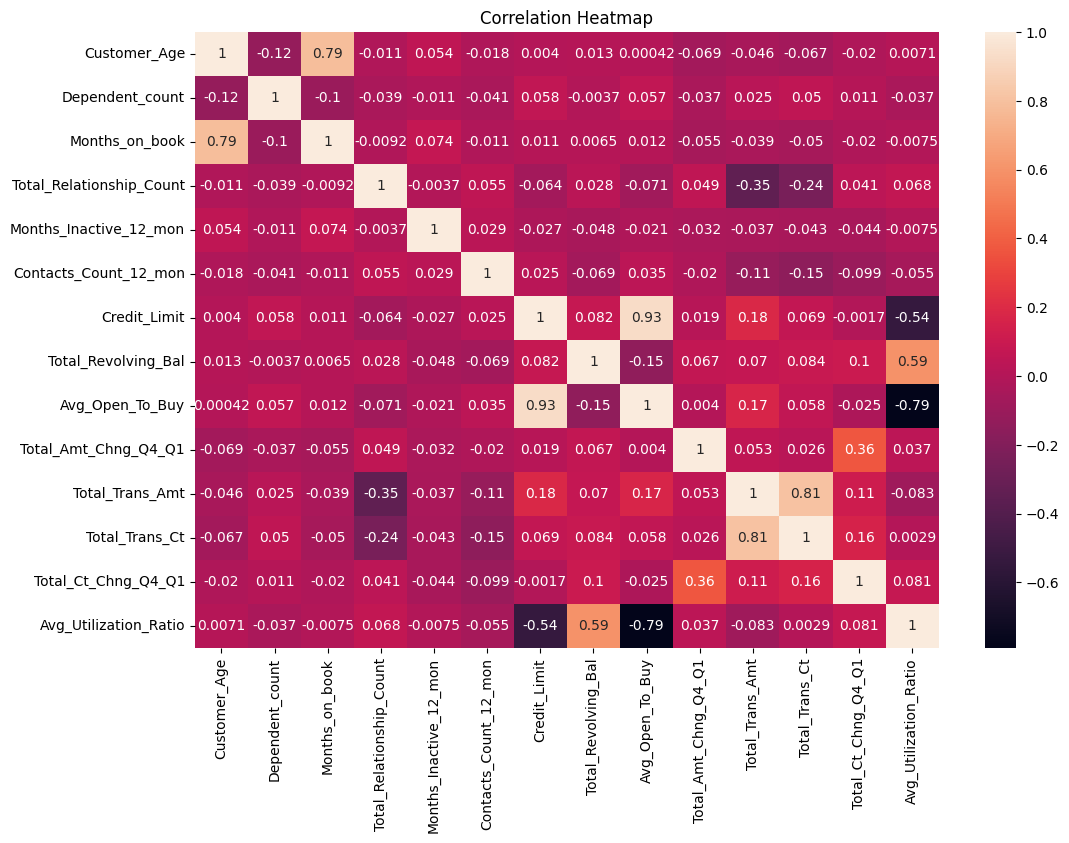

In [22]:
#correlation heatmap
cor=df[num_cols].corr()
plt.figure(figsize=(12,8))
sns.heatmap(cor,annot=True)
plt.title('Correlation Heatmap')
plt.show

We can find that high correlation between credit limit and transaction count

### Feature Engineering

<b> Encoding

In [23]:
#identifying categorical columns
print(f"Categorical columns : \n {cat_cols}")

Categorical columns : 
 Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object')


In [24]:
#one-hot encoding
df_encoded=pd.get_dummies(df, columns= cat_cols, drop_first=True)
df_encoded

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,45,3,39,5,1,3,9.448727,6.656727,9.385553,1.33500,...,False,False,False,True,False,False,False,False,False,False
1,49,5,44,6,1,2,9.018817,6.762730,8.908289,1.51474,...,True,False,False,False,False,True,False,False,False,False
2,51,3,36,4,1,0,8.137103,0.000000,8.137103,1.51474,...,False,False,False,False,True,False,False,False,False,False
3,40,4,34,3,4,1,8.105911,7.831220,6.680855,1.40500,...,False,True,False,False,False,True,False,False,False,False
4,40,3,21,5,1,0,8.458928,0.000000,8.458928,1.51474,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,2,40,3,2,3,8.295049,7.524021,7.674617,0.70300,...,True,False,True,False,False,False,False,False,False,False
10123,41,2,25,4,2,3,8.361241,7.690286,7.645876,0.80400,...,False,False,True,False,False,False,False,False,False,False
10124,44,1,36,5,3,4,8.596004,0.000000,8.596004,0.81900,...,False,False,False,False,False,True,False,False,False,False
10125,30,2,36,4,3,3,8.572060,0.000000,8.572060,0.53500,...,False,True,True,False,False,False,False,False,False,False


Here we encoded categorical columns using one-hot encoding.Now data is properly encoded

In [25]:
df_encoded.shape

(10127, 33)

In [26]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 33 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Customer_Age                      10127 non-null  int64  
 1   Dependent_count                   10127 non-null  int64  
 2   Months_on_book                    10127 non-null  int64  
 3   Total_Relationship_Count          10127 non-null  int64  
 4   Months_Inactive_12_mon            10127 non-null  int64  
 5   Contacts_Count_12_mon             10127 non-null  int64  
 6   Credit_Limit                      10127 non-null  float64
 7   Total_Revolving_Bal               10127 non-null  float64
 8   Avg_Open_To_Buy                   10127 non-null  float64
 9   Total_Amt_Chng_Q4_Q1              10127 non-null  float64
 10  Total_Trans_Amt                   10127 non-null  float64
 11  Total_Trans_Ct                    10127 non-null  int64  
 12  Tota

### Feature Selection

<b> Feature Importance using Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier

X = df_encoded.drop('Attrition_Flag_Existing Customer', axis=1)
y = df_encoded['Attrition_Flag_Existing Customer']

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X,y)

importances = rf.feature_importances_
feature_imp = pd.DataFrame({"Features": X.columns, "Importance": importances})
feature_imp = feature_imp.sort_values("Importance", ascending=False)

print("Top Important features: ")
print(feature_imp.head(12))

Top Important features: 
                    Features  Importance
10           Total_Trans_Amt    0.176652
11            Total_Trans_Ct    0.156166
12       Total_Ct_Chng_Q4_Q1    0.117097
7        Total_Revolving_Bal    0.106788
9       Total_Amt_Chng_Q4_Q1    0.061230
13     Avg_Utilization_Ratio    0.060972
3   Total_Relationship_Count    0.059993
8            Avg_Open_To_Buy    0.036237
6               Credit_Limit    0.034910
0               Customer_Age    0.032527
5      Contacts_Count_12_mon    0.030466
2             Months_on_book    0.025401


In [28]:
selected_features = feature_imp['Features'].head(12).tolist()

selected_cols = selected_features + ['Attrition_Flag_Existing Customer']
df_selected = df_encoded[selected_cols]
df_selected

,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Avg_Utilization_Ratio,Total_Relationship_Count,Avg_Open_To_Buy,Credit_Limit,Customer_Age,Contacts_Count_12_mon,Months_on_book,Attrition_Flag_Existing Customer
0,1144.0,42,1.455,6.656727,1.33500,0.061,5,9.385553,9.448727,45,3,39,True
1,1291.0,33,1.455,6.762730,1.51474,0.105,6,8.908289,9.018817,49,2,44,True
2,1887.0,20,1.455,0.000000,1.51474,0.000,4,8.137103,8.137103,51,0,36,True
3,1171.0,20,1.455,7.831220,1.40500,0.760,3,6.680855,8.105911,40,1,34,True
4,816.0,28,1.455,0.000000,1.51474,0.000,5,8.458928,8.458928,40,0,21,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,15476.0,117,0.857,7.524021,0.70300,0.462,3,7.674617,8.295049,50,3,40,True
10123,8764.0,69,0.683,7.690286,0.80400,0.511,4,7.645876,8.361241,41,3,25,False
10124,10291.0,60,0.818,0.000000,0.81900,0.000,5,8.596004,8.596004,44,4,36,False
10125,8395.0,62,0.722,0.000000,0.53500,0.000,4,8.572060,8.572060,30,3,36,False


We selected important features using randomforestclassifier and then created a new data set named df_selected including the important features

### Feature Scaling

In [29]:
from sklearn.preprocessing import StandardScaler

X = df_selected.drop('Attrition_Flag_Existing Customer', axis=1)
y = df_selected['Attrition_Flag_Existing Customer']
numeric_columns = X.select_dtypes(include=[np.number]).columns
scaler = StandardScaler()
X[numeric_columns] = scaler.fit_transform(X[numeric_columns])
df_scaled = pd.concat([X,y], axis=1)
df_scaled

,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Avg_Utilization_Ratio,Total_Relationship_Count,Avg_Open_To_Buy,Credit_Limit,Customer_Age,Contacts_Count_12_mon,Months_on_book,Attrition_Flag_Existing Customer
0,-0.960120,-0.974118,3.501500,0.371202,2.825985,-0.775882,0.763943,0.931878,0.905210,-0.165406,0.492404,0.384621,True
1,-0.916820,-1.357699,3.501500,0.404962,3.704942,-0.616276,1.407306,0.567630,0.444695,0.333570,-0.411616,1.010715,True
2,-0.741266,-1.911760,3.501500,-1.748867,3.704942,-0.997155,0.120579,-0.020938,-0.499786,0.583058,-2.219655,0.008965,True
3,-0.952167,-1.911760,3.501500,0.745260,3.168296,1.759686,-0.522785,-1.132347,-0.533199,-0.789126,-1.315636,-0.241473,True
4,-1.056734,-1.570800,3.501500,-1.748867,3.704942,-0.997155,0.763943,0.224678,-0.155051,-0.789126,-2.219655,-1.869317,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,3.261435,2.222390,0.699466,0.647422,-0.264595,0.678714,-0.522785,-0.373907,-0.330596,0.458314,0.492404,0.509840,True
10123,1.284385,0.176625,-0.115842,0.700375,0.229311,0.856458,0.120579,-0.395843,-0.259693,-0.664382,0.492404,-1.368442,False
10124,1.734170,-0.206956,0.516725,-1.748867,0.302663,-0.997155,0.763943,0.329295,-0.008217,-0.290150,1.396424,0.008965,False
10125,1.175694,-0.121716,0.066900,-1.748867,-1.086142,-0.997155,0.120579,0.311021,-0.033865,-2.036565,0.492404,0.008965,False


We use standardscaler for feature scaling.

### Data Splitting

In [30]:
from sklearn.model_selection import train_test_split

X = df_scaled.drop('Attrition_Flag_Existing Customer', axis=1)
y = df_scaled['Attrition_Flag_Existing Customer']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Splitting the data for training and testing

#### SMOTE

In [31]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [32]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

print("Original training set shape:", X_train.shape)
print("Balanced training set shape:", X_train_bal.shape)

Original training set shape: (8101, 12)
Balanced training set shape: (13602, 12)


Earlier we analysed that the data set have an class imbalace. It will give bias prediction.So we used SMOTE(Synthetic Minority Over-sampling Technique) to handle class imbalance in the training data.This will ensure our model is not bias towards majority class.We can see the difference between the shape of original training set and the balanced train set we created using SMOTE.

## Model Building and Evaluation

### LogisticRegression Model

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

lr = LogisticRegression(random_state=42)
lr.fit(X_train_bal, y_train_bal)
lr_pred = lr.predict(X_test)

print("Logistic Regression Results:")
print("\nClassification Report:")
print(classification_report(y_test, lr_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, lr_pred))

Logistic Regression Results:

Classification Report:
              precision    recall  f1-score   support

       False       0.50      0.82      0.62       327
        True       0.96      0.85      0.90      1699

    accuracy                           0.84      2026
   macro avg       0.73      0.83      0.76      2026
weighted avg       0.89      0.84      0.85      2026


Confusion Matrix:
[[ 268   59]
 [ 263 1436]]


Model got 0.84 accuracy

<b> cross-validation

In [34]:
from sklearn.model_selection import cross_val_score

cv_scores_lr = cross_val_score(lr, X_train_bal, y_train_bal, cv=5)

print("Cross-validation scores:", cv_scores_lr)
print("Mean CV Score:", cv_scores_lr.mean())
print("Standard deviation:", cv_scores_lr.std())

Cross-validation scores: [0.83902977 0.84895259 0.85441176 0.84485294 0.84742647]
Mean CV Score: 0.846934707179454
Standard deviation: 0.005040672200880344


After performing cross_validation Logisticregression model hasthe same  accuracy of 0.84

<b> Hyper parameter tuning

In [35]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}
grid_lr = GridSearchCV(LogisticRegression(random_state=42), 
                      param_grid, 
                      cv=5, 
                      scoring='accuracy')

grid_lr.fit(X_train_bal, y_train_bal)

print("Best C value:", grid_lr.best_params_)
print("Best score:", grid_lr.best_score_)

Best C value: {'C': 1}
Best score: 0.846934707179454


we performed hyper parameter for logisticRegression model and accuracy remains the same (0.84).

### RandomForestclassifier Model

In [36]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_bal, y_train_bal)
rf_pred = rf.predict(X_test)

print("Random Forest Results:")
print("\nClassification Report:")
print(classification_report(y_test, rf_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, rf_pred))

Random Forest Results:

Classification Report:
              precision    recall  f1-score   support

       False       0.85      0.89      0.87       327
        True       0.98      0.97      0.97      1699

    accuracy                           0.96      2026
   macro avg       0.91      0.93      0.92      2026
weighted avg       0.96      0.96      0.96      2026


Confusion Matrix:
[[ 291   36]
 [  52 1647]]


Got accuracy of 0.96

<b> cross-validation

In [37]:
cv_scores_rf = cross_val_score(rf, X_train_bal, y_train_bal, cv=5)

print("Cross-validation scores:", cv_scores_rf)
print("Mean CV Score:", cv_scores_rf.mean())
print("Standard deviation:", cv_scores_rf.std())

Cross-validation scores: [0.97353914 0.97905182 0.97647059 0.97573529 0.98345588]
Mean CV Score: 0.9776505447824112
Standard deviation: 0.0033949858886946683


After performing cross-validation Randomforestclassifier model got accuracy of 0.97

<b> hyper parameter tuning

In [48]:
param_grid_rf = { 
    'n_estimators': [100, 200], 
    'max_depth': [10, None] 
}

grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid_rf,
    cv=5,
    n_jobs=-1,  
    scoring='accuracy'
)

grid_rf.fit(X_train_bal, y_train_bal)
print("Best parameters:", grid_rf.best_params_) 
print("Best score:", grid_rf.best_score_)

Best parameters: {'max_depth': None, 'n_estimators': 100}
Best score: 0.9776505447824112


Accuracy of the model remains the same as 0.97

### NaiveBayes Model

In [38]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(X_train_bal, y_train_bal)
bnb_pred = bnb.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, bnb_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, bnb_pred))


Classification Report:
              precision    recall  f1-score   support

       False       0.39      0.74      0.51       327
        True       0.94      0.78      0.85      1699

    accuracy                           0.77      2026
   macro avg       0.66      0.76      0.68      2026
weighted avg       0.85      0.77      0.80      2026


Confusion Matrix:
[[ 241   86]
 [ 376 1323]]


Got accuracy of 0.77

<b> cross-validation

In [39]:
cv_scores_bnb = cross_val_score(bnb, X_train_bal, y_train_bal, cv=5)

print("Cross-validation scores:", cv_scores_bnb)
print("Mean CV Score:", cv_scores_bnb.mean())
print("Standard deviation:", cv_scores_bnb.std())

Cross-validation scores: [0.79639838 0.80264609 0.80367647 0.79816176 0.81213235]
Mean CV Score: 0.802603011436107
Standard deviation: 0.00548059498029966


After performung cross-validation Bernouli Naive bayes model got 0.80 accuracy(increased)

<b> Hyper Parameter tuning

In [44]:
param_grid_bnb = {
    'alpha': [0.1, 0.5, 1.0],
    'binarize': [0.0, 0.5]
}

grid_bnb = GridSearchCV(BernoulliNB(), 
                      param_grid_bnb, 
                      cv=5, 
                      scoring='accuracy')

grid_bnb.fit(X_train_bal, y_train_bal)

print("Best C value:", grid_bnb.best_params_)
print("Best score:", grid_bnb.best_score_)

Best C value: {'alpha': 0.1, 'binarize': 0.0}
Best score: 0.8026765138249348


After performing the hyper parameter tuning model got same accuracy(0.80) as after cross-validation

### Super Vector  Classifier (SVC) Model

In [45]:
from sklearn.svm import SVC
svc = SVC(random_state=42)
svc.fit(X_train_bal, y_train_bal)
svc_pred = svc.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, svc_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, svc_pred))


Classification Report:
              precision    recall  f1-score   support

       False       0.65      0.89      0.75       327
        True       0.98      0.91      0.94      1699

    accuracy                           0.90      2026
   macro avg       0.81      0.90      0.85      2026
weighted avg       0.92      0.90      0.91      2026


Confusion Matrix:
[[ 292   35]
 [ 159 1540]]


SVC model got accuracy of 0.90

<b> cross-validation

In [46]:
cv_scores_svc = cross_val_score(svc, X_train_bal, y_train_bal, cv=5)

print("SVC CV Scores:", cv_scores_svc)
print("Mean CV Score:", cv_scores_svc.mean())

SVC CV Scores: [0.92355752 0.9261301  0.93455882 0.92389706 0.9375    ]
Mean CV Score: 0.9291286994400847


After performing cross-validation SVC model have an increase in accuracy (0.92)

<b> Hyper Prameter Tuning

In [47]:
param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'linear']
}
grid_svc = GridSearchCV(
    SVC(random_state=42),
    param_grid_svc,
    cv=5,
    scoring='accuracy'
)

grid_svc.fit(X_train_bal, y_train_bal)

print("Best parameters:", grid_svc.best_params_)
print("Best score:", grid_svc.best_score_)

Best parameters: {'C': 10, 'kernel': 'rbf'}
Best score: 0.9523603454612275


SVC model  accuracy got increased after performing hyper parameter tuning.Model acheived 0.95 accuracy

### Save The Model

In [49]:
#saving the best model
best_model = grid_rf.best_estimator_
import joblib 
joblib.dump(best_model, 'best_random_forest_model')

['best_random_forest_model']

<b> RandomForestClassifier model is our best model with accuracy of 97%

### Conclusion

The comprehensive analysis and implementation of various machine learning models for customer attrition prediction yielded remarkable results. Through systematic preprocessing, including feature selection, scaling, and SMOTE for handling class imbalance, we established a robust foundation for model training. The comparative evaluation of multiple classifiers revealed that Random Forest emerged as the superior model with an impressive 97% accuracy, followed closely by Support Vector Classification at 95%. Logistic Regression and Bernoulli Naive Bayes also performed admirably with accuracies of 84% and 80% respectively.The successful implementation of this predictive model will enable proactive customer retention strategies, ultimately contributing to enhanced business performance and customer satisfaction.

### Limitation

* Not captured all relevant factors influencing customer churn. For example, external factors effecting churn not be represented in our dataset.
  
* There could be issues with data quality, such as inaccurate entries


### Future Work

* Data of external factors effecting churning can be represented in our Dataset
  
* We can add more balnced data in the future
  
* Implement more advanced ensemble methods
  
* Investigate additional feature engineering approaches

* Explore deep learning models, such as neural networks, for capturing complex patterns in the data.